In [34]:
# importing libraries
import cv2 # image processing, object detection
import numpy as np # blob creation, mathematical operations
import matplotlib.pyplot as plt #displaying images
import math #calculations for surface area

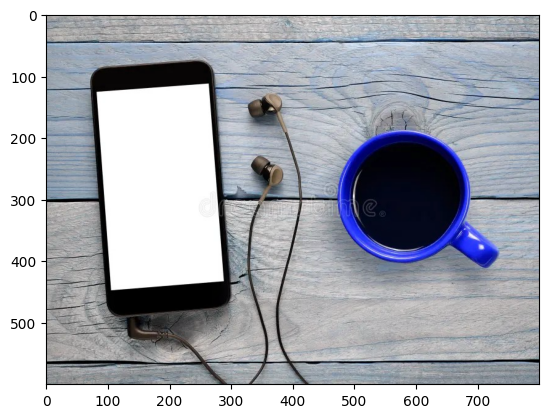

In [73]:
# Load image
img = cv2.imread("mobile and cup.jpg")  # Replace with your image path
height, width, channels = img.shape

plt.imshow(img)
plt.show()

In [74]:
# Load YOLO or other preferred object detection model
net = cv2.dnn.readNet("yolov4.weights", "yolov4.cfg") # download these files from OpenCV official github repo
classes = []
with open("coco.names", "r") as f:
    classes = [line.strip() for line in f.readlines()]

layer_names = net.getLayerNames()
output_layers = [layer_names[i - 1] for i in net.getUnconnectedOutLayers()]

In [75]:
# Resize image and perform object detection
blob = cv2.dnn.blobFromImage(img, 0.00392, (416, 416), (0, 0, 0), True, crop=False)
net.setInput(blob)
outs = net.forward(output_layers)

In [76]:
# Initialize variables for object detection
class_ids = []
confidences = []
boxes = []

In [77]:
# Function to calculate surface area based on shape
def calculate_surface_area(shape, w, h):
    if shape == 'rectangle':
        return w * h
    elif shape == 'circle':
        radius = w / 2
        return math.pi * (radius ** 2)
    else:
        return None

In [78]:
# Detect and classify shapes for each object
for out in outs:
    for detection in out:
        scores = detection[5:]
        class_id = np.argmax(scores)
        confidence = scores[class_id]
        if confidence > 0.5:  # Confidence threshold
            # Object detected
            center_x = int(detection[0] * width)
            center_y = int(detection[1] * height)
            w = int(detection[2] * width)
            h = int(detection[3] * height)

            # Rectangle coordinates
            x = int(center_x - w / 2)
            y = int(center_y - h / 2)

            boxes.append([x, y, w, h])
            confidences.append(float(confidence))
            class_ids.append(class_id)

# Non-max suppression
indexes = cv2.dnn.NMSBoxes(boxes, confidences, score_threshold=0.5, nms_threshold=0.4)

In [79]:
# Detect and calculate surface area for each object
for i in range(len(boxes)):
    if i in indexes:
        x, y, w, h = boxes[i]
        label = str(classes[class_ids[i]])

        # Assume flat object for simplicity
        if w / h < 1:
            shape = 'rectangle'  # Assume the detected object is rectangular
        elif w/h > 1:
            shape = 'circle'     # Assume the detected object is circular

        surface_area = calculate_surface_area(shape, w, h)
        print(f"Detected Object: {label}, Shape: {shape}, Surface Area: {surface_area:.2f} square units")

        # Draw bounding box and label on the image
        cv2.rectangle(img, (x, y), (x + w, y + h), (0, 255, 0), 2)
        cv2.putText(img, f"{label} {shape} {surface_area:.2f}", (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 0, 0), 2)

# Convert image to RGB (Matplotlib expects RGB format)
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)



Detected Object: cell phone, Shape: rectangle, Surface Area: 82782.00 square units
Detected Object: cup, Shape: circle, Surface Area: 56832.20 square units


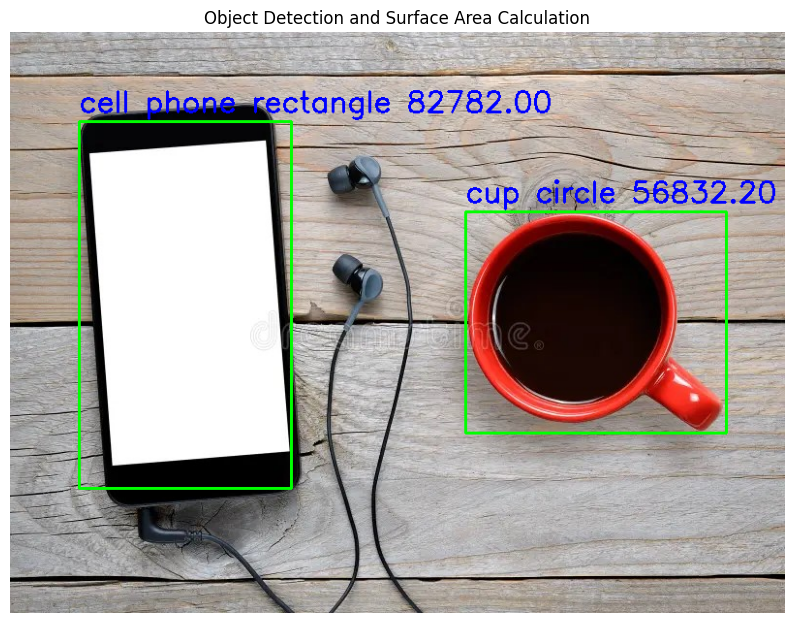

In [80]:
# Display using Matplotlib
plt.figure(figsize=(10, 8))
plt.imshow(img_rgb)
plt.title('Object Detection and Surface Area Calculation')
plt.axis('off')
plt.show()